In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

/Users/aaron/Documents/code/Deep-Learning-AI/deeplearningai/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
class AgentState(TypedDict):
    number1: int
    operator: str
    number2: int
    finalNumber: int

In [4]:
def adder(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decider_node(state: AgentState) -> str:
    if state['operator'] == '+':
        return 'add'
    elif state['operator'] == '-':
        return 'sub'

In [5]:
graph = StateGraph(AgentState)

graph.add_node("adder",adder)
graph.add_node("subtractor",subtractor)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router", decider_node,
    {
        "add": "adder",
        "sub": "subtractor"
    }
)
graph.add_edge("adder", END)
graph.add_edge("subtractor", END)

app = graph.compile()

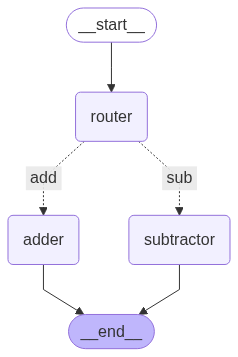

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
answer = AgentState(number1=1, operator="+", number2=2)
print(app.invoke(answer))

{'number1': 1, 'operator': '+', 'number2': 2, 'finalNumber': 3}


In [19]:
answer = AgentState(number1=5, operator="-", number2=3)
print(app.invoke(answer))

{'number1': 5, 'operator': '-', 'number2': 3, 'finalNumber': 2}
